<a href="https://colab.research.google.com/github/mentalinvestor/qae_r/blob/main/Part_4_%EA%B8%88%EC%9C%B5%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%88%98%EC%A7%91%EB%B6%80%ED%84%B0_%EC%98%88%EC%B8%A1%EA%B9%8C%EC%A7%80_%EC%A0%81%EC%9A%A9%ED%95%B4%EB%B3%B4%EA%B8%B0(%EC%88%98%EA%B0%95%EC%83%9D%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Part 4. 금융시장 데이터 수집부터 예측까지 적용해보기</b>

## 실습 가이드
1. 데이터를 다운로드하여 Colab에 불러옵니다.
2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
3. 코드는 위에서부터 아래로 순서대로 실행합니다.
4. 전체 문제 구성은 좌측 첫 번째 아이콘을 통해 확인할 수 있습니다.

## Ch 1. 데이터 수집하기
- 자본시장 시계열 소개
- 파이썬 시계열 분석 패키지 설명
- 수집한 시장 데이터의 전처리 및 시계열 처리


## Ch 2. 자본시장 데이터 이용한 시장 예측해 보기
- Auto ARIMA를 이용하여 시장 예측하기
- Kalman-Filter를 이용하여 시장 예측하기
- 데이터 설명과 전처리
- 결과 해석


## Ch 3. 자본시장 데이터와 추가 변수를 이용한 시장 예측해 보기
- ARCH, GARCH 등 변동성 모형에 대하여 이해하기
- VAR 모형 등 다변량 모형 이용하여 경제지표 예측하기
- 결과 해석, 학습 결과의 비교

## <b> Ch 1. 학습목표 </b>
- 1) 데이터 수집 방법의 이해
- 2) 시계열 예측 모델링 구현 방법 습득
- 3) 모델별 가정의 차이 이해
- 4) 시계열 모델링 결과물의 해석
- 5) 시계열 예측 결과의 모델별 비교

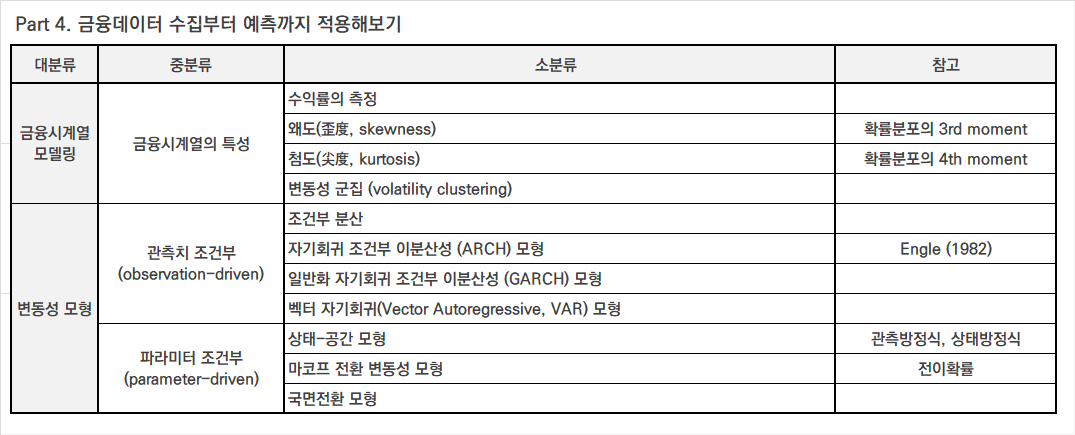

## <b> Ch 2. 데이터 수집하기 </b>

### 자본시장 시계열 소개
<b> 1. </b> 가격 시계열 vs <b>수익률 시계열</b> 

- scale-free
- stationary (<- random walk)
- distributional advantages

<b> 2. 수익률의 측정</b>
- (t-1 ~ t 기간 동안의) (One-period) Simple Return
- (t-1 ~ t - k 기간 동안의) (Multiperiod) Simple Return

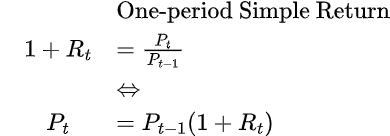

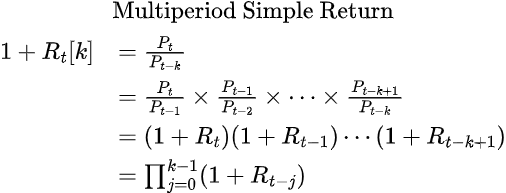

<b> 3. 연속복리 수익률(Continously Compounded Return) </b>
- 로그 수익률
- 퍼센트 수익률 r t = 100 * ln (P t / P t-1)

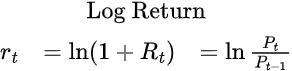

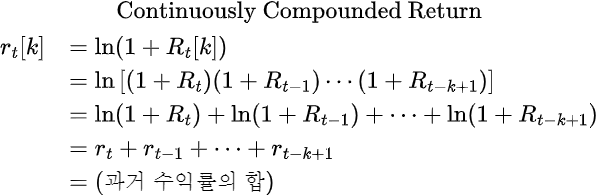

### 자본시장 시계열(수익률 분포)의 주요 통계적 속성

<b> 1. 일별 수익률 분포의 통계적 특성</b>
- (참고) 선행개념: 확률밀도함수(Probability Density Function, pdf)
- 왜도(skewness)가 높다 
  - 비대칭성
  - 정의: (확률밀도함수의 3rd central moment)
- 첨도(kurtosis)가 높다 
  - 두꺼운 꼬리분포(fat-tail)
  - 정의: (확률밀도함수의 4th central moment)
  - 정규분포의 경우 K(x) = 3이며, K(x) - 3 > 0 인 경우 첨도가 높다고 본다
  - 실무적으로는 정규분포에 비하여 극단값(extreme value)를 가질 확률이 높다는 뜻(leptokurtic)
  - 반대로 K(x) - 3 < 0 인 경우는 short-tail로 볼 수 있으며 극단적인 경우 uniform distribution over a finite interval 이 됨 (platykurtic)
- (일별, 월별, 연별) 수익률의 시계열적 특징: 자기 상관성이 없다 
  - 금융시장이 그만큼 Random Walk 하게 움직인다는 뜻

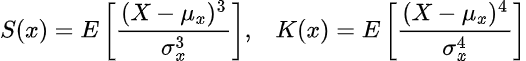

<b> 2. (c.f.) 자산 수익률을 측정하는 다른 방법</b> 
- APR (Annual Percentage Rate), CAGR (Compound Annual Growth Rate)

### 자본시장 시계열 데이터의 EDA (pandas 라이브러리로 시계열 다루기)

In [ ]:
import numpy as np  
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  
import os
import warnings        
warnings.filterwarnings("ignore") 
%matplotlib inline

In [ ]:
filename = 'https://github.com/mchoimis/tsdl/raw/main/market/tr_eod_data_rounded.csv'
data = pd.read_csv(filename,  index_col=0, parse_dates=True)
data.info()

In [ ]:
data.head()  

In [ ]:
data.tail()

In [ ]:
data.plot(figsize=(10, 15), subplots=True);

In [ ]:
instruments = ['Apple Stock', 'Microsoft Stock',
               'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
               'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
               'VIX Volatility Index', 'EUR/USD Exchange Rate',
               'Gold Price', 'VanEck Vectors Gold Miners ETF',
               'SPDR Gold Trust']

In [ ]:
for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

In [ ]:
# Summary Stats
data.info() 

In [ ]:
data.describe().round(2)  

In [ ]:
data.mean()

In [ ]:
data.aggregate([min,  
                np.mean,  
                np.std,  
                np.median,  
                max]  
).round(2)

In [ ]:
## Changes over time

data.diff().head()  

In [ ]:
data.diff().mean()  

In [ ]:
data.pct_change().round(3).head()  

In [ ]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6))

## <b> Ch 3. 금융시계열 이용하여 시장 예측하기 </b>

### 시계열을 금융분석에 응용하기

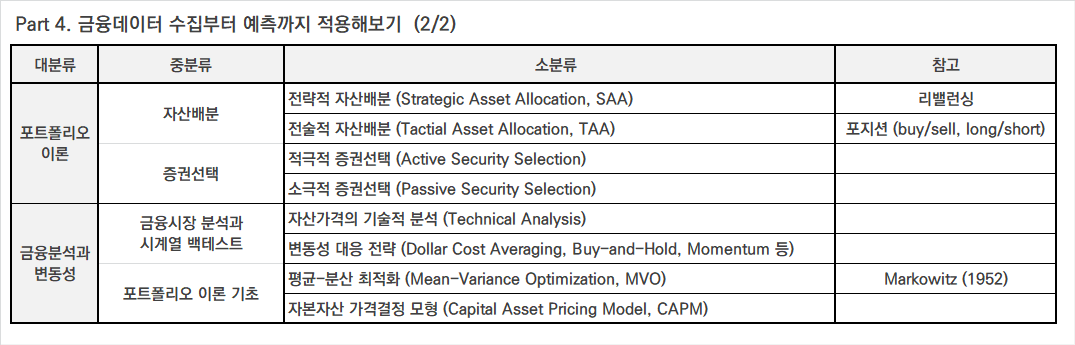

### 포트폴리오 최적화

In [ ]:
# 로그 수익률 시계열 만들기

In [ ]:
filename = 'https://github.com/mchoimis/tsdl/raw/main/market/tr_eod_data_rounded.csv'
data = pd.read_csv(filename,  index_col=0, parse_dates=True)

In [ ]:
 data

In [ ]:
data.shift(1)

In [ ]:
data.shift(periods=-1)

In [ ]:
rets = np.log(data / data.shift(1)) # 수익률 시계열 가장 간단하게 만드는 방법

In [ ]:
symbols = ['AAPL', 'MSFT', 'INTC', 'AMZN', 'GS', 'SPY', 'SPX', 'VIX', 'EUR', 'XAU', 'GDX', 'GLD']
data_asset = data.copy()
data_asset.columns = symbols

In [ ]:
rets_asset = np.log(data_asset / data_asset.shift(1)) # 자산이름 추가

In [ ]:
rets_asset_summary = rets_asset[['AAPL', 'GS', 'SPY', 'VIX', 'GLD']] # 일부 종목 추출

In [ ]:
# Daily Return Visualized
rets_asset_summary .plot(figsize=(10, 5), lw=0.5)

In [ ]:
# 일간 수익률을 연율화
rets.mean( )* 252

In [ ]:
ret = rets.dropna()

In [ ]:
# 공분산 행렬
rets.cov() * 252

In [ ]:
# import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
# import matplotlib.pyplot as plt
# %matplotlib inline

In [ ]:
# pdf 생성 위한 인수
r = 0.05
M = 2061
sigma = 0.2

In [ ]:
log_return = np.array(ret['SPY'])

In [ ]:
plt.hist(log_return.flatten(), bins=70, label='frequency')
plt.grid(True)
plt.xlabel('Log Return')
plt.ylabel('Frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r/M, scale=sigma/np.sqrt(M)), 'r', lw=2, label='pdf')
plt.legend()

In [ ]:
# SciPy에서 수익률 데이터의 통계량 구하기
# scs.describe(log_return)

In [ ]:
def print_statistics(array):
  sta = scs.describe(array)
  print('Statistic (통계량) |', 'Value (값)')
  print('--------------------')
  print('size |', sta[0])
  print('min |', sta[1][0])
  print('max |', sta[1][1])
  print('mean |', sta[2])
  print('std |', np.sqrt(sta[3]))
  print('skew|', sta[4])
  print('kurtosis |', sta[5])

In [ ]:
print_statistics(log_return)

In [ ]:
# print("Skewness: {:.7f}".format( scs.skew(log_return)) )
print("Skewness Test p-value: {:.7f}".format( scs.skewtest(log_return)[1]) ) # 샘플의 왜도가 정규분포와 일치하는지(0에 가까운 값을 가지는지 판단)
# print("Kurtosis: {:.7f}".format( scs.kurtosis(log_return)) )
print("Kurtosis Test p-value: {:.7f}".format( scs.kurtosistest(log_return)[1]) ) # 샘플의 첨도가 정규분포와 일치하는지(0에 가까운 값을 가지는지 판단)
print("Normality Test p-value: {:.7f}".format( scs.normaltest(log_return)[1]) ) # 영가설: 샘플의 분포가 정규분포이다. (유의확률이 클수록 정규분포 가설을 강하게 지지)

In [ ]:
sm.qqplot(log_return.flatten(), line='s')
plt.grid(True)
plt.xlabel("Theoretical Quantiles") #  (정규분포 상의 이론적 분위수)
plt.ylabel("Sample Quantiles") # (샘플 분위수)
plt.title("Log Return Series Q-Q Plot") # 강한 fat-tail

In [ ]:
rets.columns

In [ ]:
log_returns = rets[['AAPL.O','SPY','.VIX', 'GLD']]
log_returns.hist(bins=50, figsize=(9, 6))

In [ ]:
# 포트폴리오 이론 기초

In [ ]:
rets_asset_summary.columns

In [ ]:
np.random.seed(813)
noa = len(rets_asset_summary.columns)
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

In [ ]:
np.sum(rets_asset_summary.mean()*weights) * 252

In [ ]:
prets = [] # portfolio return
pvols = [] # poortfolio volatility
for p in range(2500):
  weights = np.random.random(noa)
  weights /= np.sum(weights)
  prets.append(np.sum(rets_asset_summary.mean() * weights) * 252)
  pvols.append(np.sqrt(np.dot(weights.T, np.dot(rets_asset_summary.cov() * 252, weights))))

prets = np.array(prets)
pvols = np.array(pvols)

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(pvols, prets, c=prets/pvols, marker='o', lw=0.5)
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio') # objective

In [ ]:
# Portfolio Optimization

In [ ]:
def statistics(weights):
  weights = np.array(weights)
  pret = np.sum(rets_asset_summary.mean() * weights) * 252
  pvol = np.sqrt(np.dot(weights.T, np.dot(rets_asset_summary.cov() * 252, weights)))
  return np.array([pret, pvol, pret/pvol])

In [ ]:
def min_sharpe(weights):
  return statistics(weights)[2]  * (-1)

In [ ]:
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for x in range(noa))

In [ ]:
optimize = sco.minimize(min_sharpe, noa * [1. / noa,], method='SLSQP', bounds=bounds, constraints=constraints)
optimize

In [ ]:
optimize.x.round(3)

In [ ]:
statistics(optimize.x.round(3)) # [pret, pvol, pret/pvol]

### 자산가격 시계열의 기술적 분석과 매매전략

In [ ]:
# 기술적 분석

In [ ]:
rets.cumsum().apply(np.exp).plot(figsize=(12, 6))
plt.show()

In [ ]:
# 시계열의 Sampling
data.resample('1w', label='right').last().head()  

In [ ]:
data.resample('1m', label='right').last().head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,27.44,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.39,1081.05,40.72,105.96
2010-02-28,29.23,28.67,20.53,118.40,156.35,110.74,1104.49,19.50,1.36,1116.10,43.89,109.43
2010-03-31,33.57,29.29,22.29,135.77,170.63,117.00,1169.43,17.59,1.35,1112.80,44.41,108.95
2010-04-30,37.30,30.54,22.84,137.10,145.20,118.81,1186.69,22.05,1.33,1178.25,50.51,115.36
2010-05-31,36.70,25.80,21.42,125.46,144.26,109.37,1089.41,32.07,1.23,1215.71,49.86,118.88


In [ ]:
rets.cumsum().apply(np.exp).resample('1m', label='right').last().plot(figsize=(12, 6)) # 월간 수익률

In [ ]:
## 시계열의 Rolling Statistics 구하기

sym = 'AAPL.O'
data = pd.DataFrame(data[sym]).dropna()
data.tail()

In [ ]:
import math
window = 20
data[sym].rolling(window=window).std() * math.sqrt(window)

In [ ]:
## 특정 기간 동안의 Rolling 지표 구하기 
window = 20  

data['min'] = data[sym].rolling(window=window).min()  
data['mean'] = data[sym].rolling(window=window).mean()  
data['std'] = data[sym].rolling(window=window).std()  
data['median'] = data[sym].rolling(window=window).median()  
data['max'] = data[sym].rolling(window=window).max()  
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean() # Exponentially Weighted Moving Average

data.dropna().head()

In [ ]:
# Price Movement의 시각화
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(12, 6), style=['g--', 'r--', 'g--'], lw=0.8)  
data[sym].iloc[-200:].plot(ax=ax, lw=2.0)
plt.title("APPL 20-Day Moving Average Price Movement") # 구간화
plt.show()

In [ ]:
###  자본시장 시계열의 기술적 분석
data['SMA1'] = data[sym].rolling(window=42).mean()  # short-term
data['SMA2'] = data[sym].rolling(window=252).mean()  # long-term
data[[sym, 'SMA1', 'SMA2']].tail()

In [ ]:
data[[sym, 'SMA1', 'SMA2']].plot(figsize=(12, 6))
plt.title("AAPL Simple Moving Average - Long & Short-term")
plt.show()

In [ ]:
### 가격 추이에 따른 포지션(Trading Strategy)
# 예시: 골든 크로스(Golden Cross), 데드 크로스(Dead Cross)

data.dropna(inplace=True)  

data['positions'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)  # 1: buy , -1: sell /

ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(12, 6), secondary_y='positions') 
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

plt.title("AAPL Trading Window based on Technical Analysis")
plt.show()

### Auto ARIMA로 자산가격 예측하기

In [ ]:
## Auto Arima(p, d, q) 실습

In [ ]:
import numpy as np  
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  
import os
import warnings        
warnings.filterwarnings("ignore") 
%matplotlib inline

In [ ]:
import pmdarima as pm
from pmdarima.arima import ndiffs

In [ ]:
filename = 'https://github.com/mchoimis/tsdl/raw/main/market/tr_eod_data_rounded.csv'
data = pd.read_csv(filename, index_col=0, parse_dates=True)

In [ ]:
# 차분이 필요한지, 필요하다면 몇 차 차분이 최선인지 파악

In [ ]:
data_y = data.dropna()

In [ ]:
data_y

In [ ]:
y = data_y[['AAPL.O']].iloc[-200:]
y

In [ ]:
ndiffs(y) # 차수

In [ ]:
y_train = y['AAPL.O'][:int(0.7*len(y))]
y_test = y['AAPL.O'][int(0.7*len(y)):] 

In [ ]:
y_train.plot()
y_test.plot()

In [ ]:
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"d = {n_diffs}")

In [ ]:
model = pm.auto_arima(y = y_train       # 데이터
                      , d = 1           # (d)차분 차수 (기본값 = none), 지정하지 않으면 실행 기간이 매우 길어질 수 있음
                      , start_p = 0     # (p)탐색 시초값 (기본값 = 2)
                      , max_p = 3       # (기본값 = 5)
                      , start_q = 0     # (q)탐색 시초값 (기본값 = 2)
                      , max_q = 3       # (기본값 = 5)
                      , m = 1           # (기본값 = 1)
                      , seasonal = False # 기본값 = True, 계절변동 ARIMA(SARIMA)에 해당시 True로 수정
                      , stepwise = True  
                      , trace=True      # stepwise로 모델을 적합할 때마다 결과를 프린트
                      )

In [ ]:
model = pm.auto_arima (y_train, d = 1, seasonal = False, trace = True)
model.fit(y_train)

In [ ]:
# 잔차 검정
# 잔차가 백색잡음 과정인지 (=정상성을 만족하는지), 정규성 및 등분산성을 만족하는지 파악합

# 1. summary 결과에서 Ljung-Box (Q) / Heteroskedasticity (H) / Jarque-Bera (JB) 검정 만족 여부를 파악
# 2. plot_diagnostics 잔차 그래프로 정상성과 정규성을 만족하는지 파악

In [ ]:
print(model.summary())

In [ ]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
# 모형 예측

In [ ]:
y_train.head(5)

In [ ]:
y_test

In [ ]:
y_pred = model.predict(n_periods=len(y_test)) # Test 기간 = 60일 

In [ ]:
y_pred

In [ ]:
y_test_predict_df = pd.DataFrame({"test": y_test, "pred": y_pred})
y_predict_df = y_test_predict_df['pred']
y_predict_df

In [ ]:
# 모델 업데이트 설정

In [ ]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)               
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [ ]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트
    model.update(new_ob)

In [ ]:
pd.DataFrame({"test": y_test, "pred": y_pred})

In [ ]:
# 결과의 해석

In [ ]:
print(model.summary())

In [ ]:
y_test_predict_df = pd.DataFrame({"test": y_test, "pred": y_pred})
y_predict_df = y_test_predict_df['pred']
y_predict_df

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(y_train, label='Train')        
plt.plot(y_test, label='Test')          
plt.plot(y_predict_df, label='Prediction')   
plt.legend()
plt.show()

In [ ]:
# 시계열 모형의 평가 (mean absolute percentage error)

In [ ]:
def MAPE(y_test, y_pred): 
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE (%): {MAPE(y_test, y_pred):.3f}")

## <b> Ch 4. 금융시계열과 추가 변수를 이용한 시장 예측해 보기 </b>

### 변동성의 개념과 모형의 필요성
- 금융시계열에서 수익률의 분산을 보는 이유
  - t시점의 수익률 = 100 * ln(xt / xt-1)
- 시간가변하는 변동성을 모형화하는 경우, 분산이 시점 t에 의존하므로, t-1기까지의 정보를 이용하여 변동성을 측정하는 조건부 분산이 예측오차를 줄일 수 있다는 장점을 가진다
- 지금까지 다룬 시계열 분석은 **다른 변수** 또는 **해당 변수 자체의 과거값**의 변화에 대응하는 종속변수의 평균적인 변화 분석에 초점을 둠
  - 따라서 회귀모형 또는 시계열 모형에 포함되는 오차항에 대한 정보는 추정값에 대한 통계적 추론을 위하여 보조적 역할이었음
- 금융시장의 변동성은 시간에 따라 변화하는 것이 일반적 
  - 변동성이 커진다는 것은 일반적으로 자산시장으로 유입되는 정보의 양이 많아짐을 뜻함
  - 예) FOMC 금리 발표, 신흥국 환 위기, 유럽발 재정위기, 산유국 감산 소식 등
- 금융시장에서 변동성에 대한 관심이 증가함에 따라 금융시계열의 **분산**(variance) 및 **공분산**(covariance) 등에 대한 추정과 예측이 필요

- 변동성
  - 변동성은 자산 수익의 표준편차 혹은 분산으로 측정됨
- 대부분의 금융시계열은 변동성의 군집현상(volatility clustering)이 나타남
  - <b>오차항의 분산이 일정하다</b>는 OLS 회귀모형의 기본 가정을 <b>위배</b>
  - 기준금리를 비롯한 각종 경제지표의 발표, 금융위기, 재정 위기와 같은 외부 충격(shock)에 영향을 받는다는 의미
  - 이러한 충격이 일정기간 동안 영향을 미치게 되므로 시계열상 <b>이분산성</b>이 발생
- 조건부 분산
  - x 의 값을 알고 있을 때 이에 대한 조건부확률분포 p(y|x)의 분산
  - 예측문제의 관점으로 보면 조건부분산은 예측의 불확실성를 뜻함
- 조건부 이분산성 (Conditional Heteoskedasticity)
  - 오차항의 분산과 독립변수가 일정한 관계를 가질 수 있다 

### 변동성 모형: ARCH, GARCH 

<b>ARCH</b> (AutoRegressive Conditional Heteroskedasticity)
- ARCH 는 Engle(1982)에 의해 제시되었으며, 오차항의 분산의 현재값이 이전의 오차항의 제곱값들에 의존할 것이라는 접근에서 출발
- "바로 직전의 오차항의 제곱값에 의존": &sigma;t^2 = &alpha;0 + &alpha;1 * 
&varepsilon;t-1 ^2
- 전체 모형은 조건부 평균과 분산에 대해 두 개의 구별되는 모형을 포함함

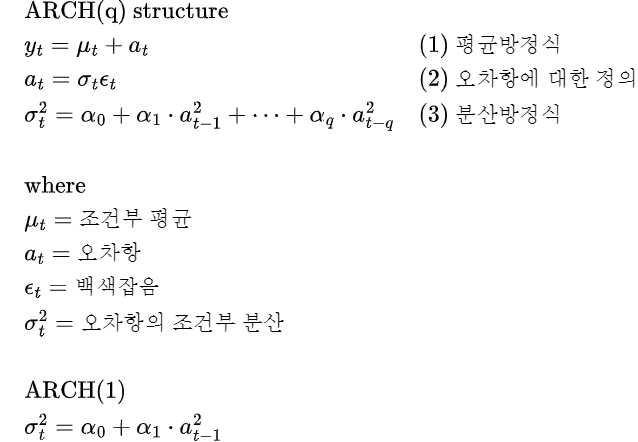

- ARCH 모형의 문제점
  - 양(+)의 shock과 음(-)의 shock을 동일하게 다루고 있음(과거 shock의 제곱값) 
  - : 실제로는 방향에 따라 비대칭적인 영향력을 보일 때가 많다 
  - ARCH 의 차수를 어떻게 결정해야 하는가?
  - : 실제로 필요한 q 값이 상당히 클 수가 있음
  - 조건부 분산이 양(+)이 되기 위한 충분조건은 파라미터가 모두 비음성(non-negative)이어야 함
  - : 추정해야하는 모수가 많아지는 경우 이러한 제약이 충족되지 않을 수 있음

<b>GARCH</b> (Generalized AutoRegressive Conditional Heteroskedasticity)
- ARCH 모형과 달리, GARCH 모형은 변동성의 시계열 의존성, 즉 자기상관을 표현하는 데 있어서 모수의 수를 줄일 수 있다는 장점
- GARCH 모형은 조건부분산이 직전의 오차항의 제곱값과 함께 자체 시차값(lagged values)에 의존하도록 함
- GARCH (1,1)
  - (1) Yt = &gamma;0 + &gamma;1* X1t + ... +  &gamma;k*Xkt + &varepsilon;t
  - (2) &sigma;t^2 = &omega; + &alpha;0 + &alpha;1 * 
&varepsilon;t-1 ^2 + ... + &alpha;q * &varepsilon;t-q ^2 
  - 조건부 평균에 대한 식 (1) 은 외생 변수 및 오차항의 함수로 표현됨

- GARCH(1, 1) = ARCH(∞) 모형이므로 추정해야 하는 모수의 수를 줄일 수 있다는 장점

### 벡터자기회귀(Vector AutoRegressive Model, VAR)

- 실증분석에서는 2개 이상의 시계열을 동시에 모형화하는 것이 유리
- 자산시장를 비롯한 거시경제 시계열은 서로 독립적으로 움직이는 것이 아니라 일정한 상관관계를 보이는 편
- 벡터자기회귀(VAR)은 k개의 AR식을 벡터로 쌓은 것과 같다 
- 다만 단일 시계열 AR과 다른 점은 설명변수로 자기 자신의 lag뿐 아니라 다른 변수들의 lag도 포함한다는 점

In [ ]:
Python `statsmodels` Datasets Package
# https://www.statsmodels.org/0.6.1/datasets/index.html
US Marcroecnomic Data
# https://www.statsmodels.org/0.6.1/datasets/generated/macrodata.html

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [ ]:
# Load data
mdata = sm.datasets.macrodata.load_pandas().data
mdata

In [ ]:
df = mdata.copy()

In [ ]:
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]

In [ ]:
from statsmodels.tsa.base.datetools import dates_from_str
quarterly = dates_from_str(quarterly)

In [ ]:
mdata[['tbilrate', 'infl',	'realint']].plot(figsize=(18, 6), linewidth=5)

In [ ]:
mdata = mdata[['realgdp','realcons','realinv']] # select 3 series
mdata.index = pd.DatetimeIndex(quarterly)
data = np.log(mdata).diff().dropna()

In [ ]:
import matplotlib.pyplot as plt
df[['realgdp',	'realcons',	'realinv',	'realgovt',	'realdpi']].plot(figsize=(18, 6), linewidth=5)

In [ ]:
# EDA

In [ ]:
# Visualize serial correlations 
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
data.plot(ax=ax1) # series plot
pd.plotting.lag_plot(data) # lag plot # Random series does not exhibit a structure in the lag plot.
plt.show() 

In [ ]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
for i in data:
  plot_acf(data[i], lags=50)
  plt.title('ACF for %s' % i)
  plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
for i in data:
  plot_pacf(data[i], lags=50)
  plt.title('PACF for %s' % i)
  plt.show()

In [ ]:
# Stationarity Check
# (H0): non-stationary
# (H1): stationary

from statsmodels.tsa.stattools import adfuller
def adf(time_series):
  result = adfuller(time_series.values)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])

for i in data:
  print('--Test statistic for %s' % i)
  adf(data[i])

In [ ]:
obs = 5
X_train, X_test = data[0:-obs], data[-obs:]

print(X_train.shape)
print(X_test.shape)

In [ ]:
X_train.plot(figsize=(12, 6), linewidth=5)
plt.show()

In [ ]:
model_var = VAR(endog=X_train)
res = model_var.select_order(6)
res.summary()

In [ ]:
model_fit = model_var.fit(maxlags=3, ic='aic')
model_fit.summary()

In [ ]:
X_test.shape

In [ ]:
lag_order = model_fit.k_ar
print(lag_order)

In [ ]:
model_fit.forecast(X_train.values[-lag_order:], steps=5)

In [ ]:
model_fit.plot_forecast(10)

In [ ]:
pred = model_fit.forecast(X_train.values[-lag_order:], steps=obs)
pred = pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred')
pred

In [ ]:
# VAR Forecast evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
#Calculate forecast bias
forecast_errors = [X_test['realgdp'][i]- pred['realgdp_pred'][i] for i in range(len(X_test['realgdp']))]
bias = sum(forecast_errors) * 1.0/len(X_test['realgdp'])
print('Bias: %f' % bias)

#Calculate mean absolute error
mae = mean_absolute_error(X_test['realgdp'],pred['realgdp_pred'])
print('MAE: %f' % mae)

#Calculate mean squared error and root mean squared error
mse = mean_squared_error(X_test['realgdp'], pred['realgdp_pred'])
print('MSE: %f' % mse)
rmse = np.sqrt(mse)
print('RMSE: %f' % rmse)

### 벡터오차수정모형(Vector Autocorection Model, VECM)

- 공적분 관계의 존재 여부에 따라 VAR와 VECM을 선택
- 공적분(Cointegration): 두 비정상 시계열을 선형조합 했을 때 시계열의 적분 차수가 낮아지거나 정상상태가 되는 경우
   * 적분차수: 정상성이 되기까지 차분해야 하는 횟수
- 두 개 이상의 시계열이 공적분 관계에 있으면 장기관계 또는 균형관계를 가진다는 의미
  - VAR 모형은 각 시계열이 안정성 조건을 만족하지 않아도 사용할 수 있지만, 일반적으로 불안정성 시계열의 경우 차분을 하거나 변수간 장기적 관계에 대하여 정보를 상실할 수 있다는 단점
  - 따라서 변수간 공적분 관계에 있는 시계열은 차분을 거치지 않고 원 데이터를 써서 모형에 적합시킬 수 있다는 점에서 장점을 가진다
  - "Spurious Correlation" (가짜 상관관계)

In [ ]:
# VECM Estimation and Analysis

In [ ]:
from statsmodels.tsa.vector_ar import vecm

In [ ]:
## Statistical Test for Cointegration (VECM 공적분 테스트)
## 귀무가설 : 공적분 특성없다, 대립가설 : 공적분 특성 있다

In [ ]:
vec_rank = vecm.select_coint_rank(X_train, det_order = 1, k_ar_diff = 1, method = 'trace', signif=0.01)
print(vec_rank.summary())

In [ ]:
vec_rank2 = vecm.select_coint_rank(X_train, det_order = 1, k_ar_diff = 1, method = 'maxeig', signif=0.01)
print(vec_rank2.summary())

In [ ]:
vecm = vecm.VECM(endog = X_train, k_ar_diff = 9, coint_rank = 3, deterministic = 'ci')
vecm_fit = vecm.fit()
vecm_fit.predict(steps=10)

In [ ]:
forecast, lower, upper = vecm_fit.predict(10, 0.05)
print('Lower Bounds of Confidence Intervals:')
print(lower.round(3))
print('\nPoint Forecasts:')
print(forecast.round(3))
print('\nUpper Bounds of Confidence Intervals:')
print(upper.round(3))

In [ ]:
vecm_fit.plot_forecast(steps=10, n_last_obs=50)

In [ ]:
# Lag order selection

In [ ]:
results = model.fit(maxlags=15, ic='aic')

In [ ]:
model.select_order().summary() # default: 15

In [ ]:
results.plot_acorr()

In [ ]:
# Forecasting

In [ ]:
lag_order = results.k_ar ## 위의 결과는?
results.forecast(data.values[-lag_order:], 5)

In [ ]:
results.plot_forecast(10)

<b> 충격반응함수 </b>(Impulse Response Function, IRF)
- 충격반응함수는 VAR의 추정계수를 바탕으로 모형 내 변수에 대하여 일정한 크기의 충격을 가할 때 모형의 모든 변수들이 시간의 흐름에 따라 어떻게 반응하는가를 나타낸 것
- 내생변수의 현재값과 미래값에 대한 오차항 중 하나에 대한 1표준편차 충격(one standard deviation shock)의 효과를 추적함
- 즉, 특정 변수의 단위당 충격(unit shock)의 크기에 해당하는 충격을 그것이 자기 자신의 변수와 나머지 변수에 미치는 영향을 의미
- 변수간의 상호인과관계를 분석하고 변수의 변화에 따른 파급효과를 분석하는 데 이용




In [ ]:
irf = results.irf(10)

In [ ]:
irf.plot(orth=False)

In [ ]:
irf.plot(impulse='realgdp')

In [ ]:
irf.plot_cum_effects(orth=False)

## <b> Ch 5. Part 4 요약 및 정리</b>

### 다변량 시계열의 예측

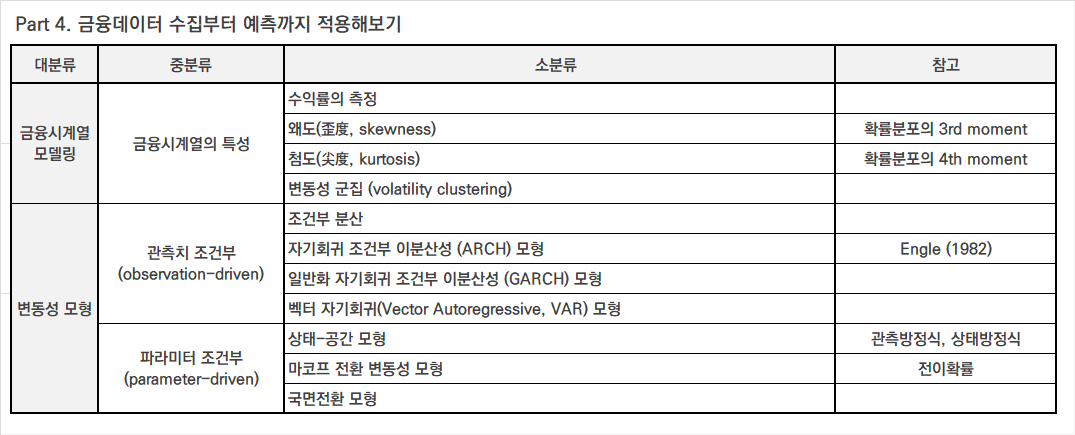

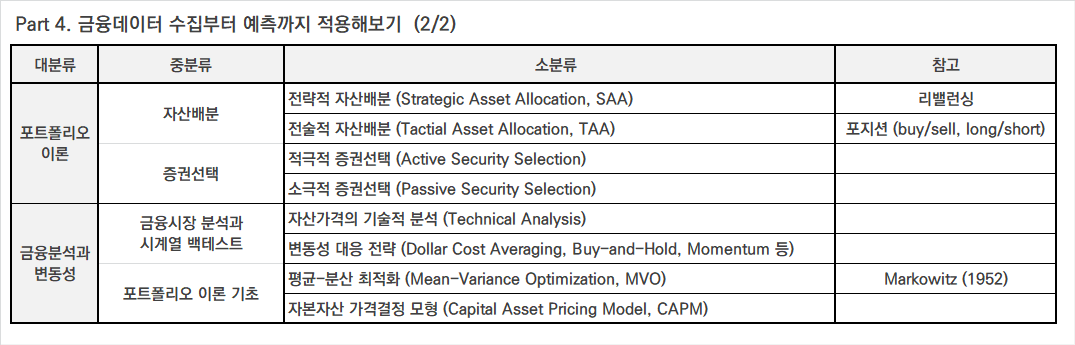

### 다음 파트: 딥러닝과 시계열

<b> 인공신경망</b> (Neural Network)
  - Multi-layered Perceptron (MLP), Retricted Boltzman Machines (RBM), Deep Belief Network(DBN)

<b> 딥러닝과 시계열</b> 
  - 아주 긴 시계열
  - 다변수 X, 다변수 y
  - 순환, 기억(memory)
  - t가 가변적인 경우
  - 숫자뿐 아니라 비정형 데이터
